In [21]:
import pandas as pd
import tensorflow as tf

from window import WindowGenerator
from utils import train_test_val_split

## Datasets

In [22]:
case_1 = pd.read_csv("../datasets/case_1.csv")
case_2 = pd.read_csv("../datasets/case_2.csv")
case_3 = pd.read_csv("../datasets/case_3.csv")
case_4 = pd.read_csv("../datasets/case_4.csv")
case_5 = pd.read_csv("../datasets/case_5.csv")

In [23]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]

In [24]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

## Case 1

In [25]:
train_df, test_df, val_df = train_test_val_split(case_1)
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(128, 272)
(36, 272)
(19, 272)


In [26]:
# train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

In [27]:
label_columns = outlets

## Window generation

In [28]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df,
    val_df=val_df, test_df=test_df,
    label_columns=label_columns
    
    )
    
single_step_window


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['outlet_fan_speed', 'outlet_1', 'outlet_2', 'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8', 'outlet_9', 'outlet_10', 'outlet_11', 'outlet_12', 'outlet_13', 'outlet_14', 'outlet_15', 'outlet_16', 'outlet_17', 'outlet_18', 'outlet_19', 'outlet_20', 'outlet_21', 'outlet_22', 'outlet_23', 'outlet_24', 'outlet_25', 'outlet_26', 'outlet_27', 'outlet_28', 'outlet_29', 'outlet_30', 'outlet_31', 'outlet_32', 'outlet_33', 'outlet_34', 'outlet_35', 'outlet_36', 'outlet_37', 'outlet_38', 'outlet_39', 'outlet_40', 'outlet_41', 'outlet_42', 'outlet_43', 'outlet_44', 'outlet_45', 'outlet_46', 'outlet_47', 'outlet_48', 'outlet_49', 'outlet_50', 'outlet_51', 'outlet_52', 'outlet_53', 'outlet_54', 'outlet_55', 'outlet_56', 'outlet_57', 'outlet_58', 'outlet_59', 'outlet_60', 'outlet_61', 'outlet_62', 'outlet_63', 'outlet_64', 'outlet_65', 'outlet_66', 'outlet_67', 'outlet_68', 'outlet_69', 'outlet_70

In [29]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 272)
Labels shape (batch, time, features): (32, 1, 136)


In [30]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=136), # 136
    tf.keras.layers.Dense(units=68), # 136
    tf.keras.layers.Dense(units=136) # 136
])

In [31]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 272)
Labels shape (batch, time, features): (32, 1, 136)


In [32]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    train_df=train_df,
    val_df=val_df, test_df=test_df,
    label_columns=label_columns
)

wide_window


Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['outlet_fan_speed', 'outlet_1', 'outlet_2', 'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8', 'outlet_9', 'outlet_10', 'outlet_11', 'outlet_12', 'outlet_13', 'outlet_14', 'outlet_15', 'outlet_16', 'outlet_17', 'outlet_18', 'outlet_19', 'outlet_20', 'outlet_21', 'outlet_22', 'outlet_23', 'outlet_24', 'outlet_25', 'outlet_26', 'outlet_27', 'outlet_28', 'outlet_29', 'outlet_30', 'outlet_31', 'outlet_32', 'outlet_33', 'outlet_34', 'outlet_35', 'outlet_36', 'outlet_37', 'outlet_38', 'outlet_39', 'outlet_40', 'outlet_41', 'outlet_42', 'outlet_43', 'outlet_44', 'outlet_45', 'outlet_46', 'outlet_47', 'outlet_48', 'outlet_49', 'outlet_50', 'outlet_51', 'outlet_52', 'outlet_53', 'outlet_54', 'outlet_55', 'outlet_56', 'outlet_57', 'outlet_58', 'outlet_59',

In [33]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 272)
Labels shape (batch, time, features): (32, 24, 136)


## Model creation

In [34]:
MAX_EPOCHS = 30

In [35]:
linear.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [36]:
history = linear.fit(
    single_step_window.train,
    epochs=MAX_EPOCHS,
    validation_data=single_step_window.val,
    verbose=0
    # callbacks=[early_stopping]
)

2022-08-29 17:51:50.458349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-29 17:51:50.904959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [37]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 272)
Labels shape (batch, time, features): (32, 24, 136)


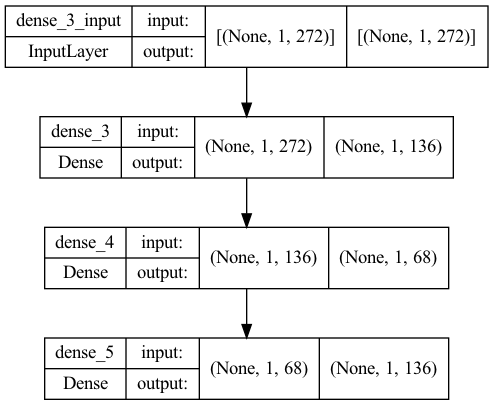

In [38]:
tf.keras.utils.plot_model(linear, "../plots/models/linear.png", show_shapes=True)

label_col_index 135
label_col_index 135
label_col_index 135


2022-08-29 17:52:04.285640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


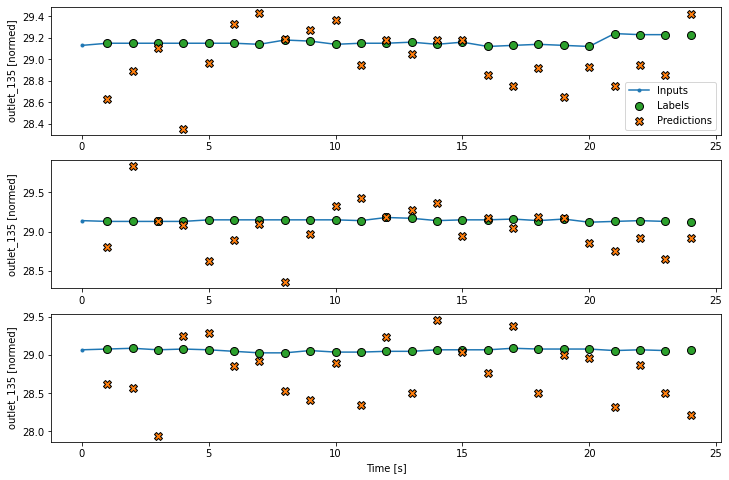

In [39]:
wide_window.plot(linear, plot_col="outlet_135")

In [40]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

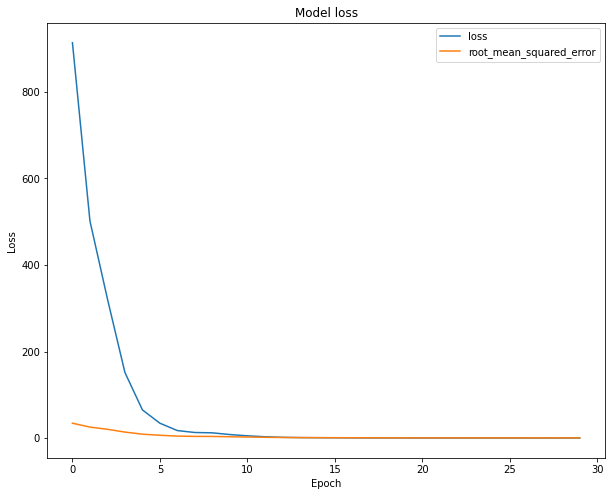

In [41]:
losses[['loss', 'root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [42]:
linear.evaluate(single_step_window.test)

1/1 [==============================] - 0s 251ms/step - loss: 0.4206 - root_mean_squared_error: 0.6485


[0.42061281204223633, 0.6485466957092285]

## Case 2

In [43]:
train_df, test_df, val_df = train_test_val_split(case_2)
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(142, 272)
(41, 272)
(21, 272)


In [44]:
# train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

In [45]:
# Generate window
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df,
    val_df=val_df, test_df=test_df,
    label_columns=label_columns
    
    )
    
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['outlet_fan_speed', 'outlet_1', 'outlet_2', 'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8', 'outlet_9', 'outlet_10', 'outlet_11', 'outlet_12', 'outlet_13', 'outlet_14', 'outlet_15', 'outlet_16', 'outlet_17', 'outlet_18', 'outlet_19', 'outlet_20', 'outlet_21', 'outlet_22', 'outlet_23', 'outlet_24', 'outlet_25', 'outlet_26', 'outlet_27', 'outlet_28', 'outlet_29', 'outlet_30', 'outlet_31', 'outlet_32', 'outlet_33', 'outlet_34', 'outlet_35', 'outlet_36', 'outlet_37', 'outlet_38', 'outlet_39', 'outlet_40', 'outlet_41', 'outlet_42', 'outlet_43', 'outlet_44', 'outlet_45', 'outlet_46', 'outlet_47', 'outlet_48', 'outlet_49', 'outlet_50', 'outlet_51', 'outlet_52', 'outlet_53', 'outlet_54', 'outlet_55', 'outlet_56', 'outlet_57', 'outlet_58', 'outlet_59', 'outlet_60', 'outlet_61', 'outlet_62', 'outlet_63', 'outlet_64', 'outlet_65', 'outlet_66', 'outlet_67', 'outlet_68', 'outlet_69', 'outlet_70

In [46]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 272)
Labels shape (batch, time, features): (32, 1, 136)


In [47]:
history = linear.fit(
    single_step_window.train,
    epochs=MAX_EPOCHS,
    validation_data=single_step_window.val,
    # callbacks=[early_stopping]
)

Epoch 1/30
5/5 [==============================] - 0s 85ms/step - loss: 4.0760 - root_mean_squared_error: 2.2966 - val_loss: 2.8452 - val_root_mean_squared_error: 1.8859
Epoch 2/30
5/5 [==============================] - 0s 76ms/step - loss: 2.1604 - root_mean_squared_error: 1.6716 - val_loss: 1.0156 - val_root_mean_squared_error: 1.1245
Epoch 3/30
5/5 [==============================] - 0s 74ms/step - loss: 1.0986 - root_mean_squared_error: 1.1852 - val_loss: 0.8127 - val_root_mean_squared_error: 1.0144
Epoch 4/30
5/5 [==============================] - 0s 74ms/step - loss: 0.8043 - root_mean_squared_error: 1.0160 - val_loss: 0.6085 - val_root_mean_squared_error: 0.8693
Epoch 5/30
5/5 [==============================] - 0s 72ms/step - loss: 0.6200 - root_mean_squared_error: 0.8940 - val_loss: 0.4905 - val_root_mean_squared_error: 0.7839
Epoch 6/30
5/5 [==============================] - 0s 76ms/step - loss: 0.4461 - root_mean_squared_error: 0.7542 - val_loss: 0.4172 - val_root_mean_squared_

In [48]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 272)
Labels shape (batch, time, features): (32, 24, 136)


label_col_index 135
label_col_index 135
label_col_index 135


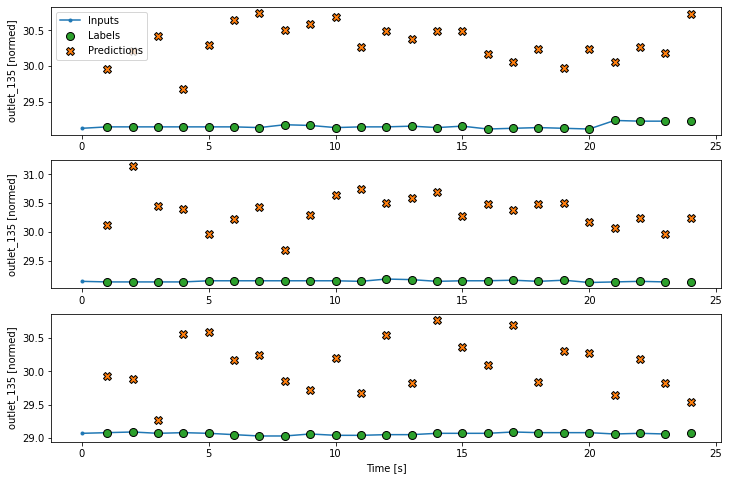

In [49]:
wide_window.plot(linear, plot_col="outlet_135")

In [50]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

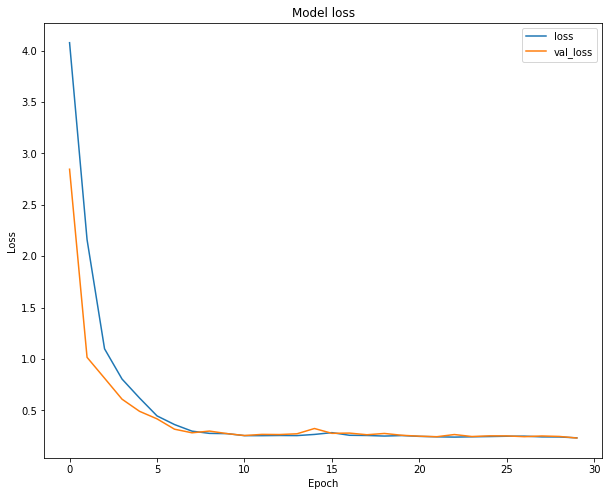

In [51]:
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

<AxesSubplot:title={'center':'RMSE'}, xlabel='Epoch', ylabel='RMSE'>

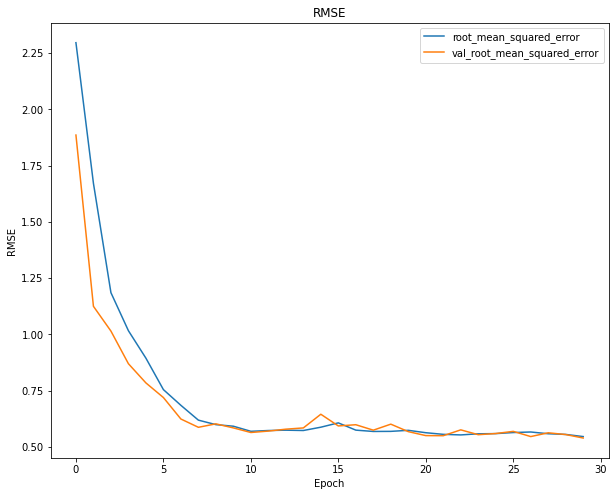

In [52]:
losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")

In [53]:
linear.evaluate(single_step_window.test)

1/1 [==============================] - 0s 259ms/step - loss: 0.2042 - root_mean_squared_error: 0.5137


[0.20423845946788788, 0.51369708776474]

## Case 3


In [54]:
train_df, test_df, val_df = train_test_val_split(case_3)
print("train shape:", train_df.shape)
print("val shape:", val_df.shape)
print("test shape:", test_df.shape)

train shape: (147, 272)
val shape: (42, 272)
test shape: (22, 272)


In [55]:
# train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

In [56]:
# Generate window
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df,
    val_df=val_df, test_df=test_df,
    label_columns=label_columns
    )
    
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['outlet_fan_speed', 'outlet_1', 'outlet_2', 'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8', 'outlet_9', 'outlet_10', 'outlet_11', 'outlet_12', 'outlet_13', 'outlet_14', 'outlet_15', 'outlet_16', 'outlet_17', 'outlet_18', 'outlet_19', 'outlet_20', 'outlet_21', 'outlet_22', 'outlet_23', 'outlet_24', 'outlet_25', 'outlet_26', 'outlet_27', 'outlet_28', 'outlet_29', 'outlet_30', 'outlet_31', 'outlet_32', 'outlet_33', 'outlet_34', 'outlet_35', 'outlet_36', 'outlet_37', 'outlet_38', 'outlet_39', 'outlet_40', 'outlet_41', 'outlet_42', 'outlet_43', 'outlet_44', 'outlet_45', 'outlet_46', 'outlet_47', 'outlet_48', 'outlet_49', 'outlet_50', 'outlet_51', 'outlet_52', 'outlet_53', 'outlet_54', 'outlet_55', 'outlet_56', 'outlet_57', 'outlet_58', 'outlet_59', 'outlet_60', 'outlet_61', 'outlet_62', 'outlet_63', 'outlet_64', 'outlet_65', 'outlet_66', 'outlet_67', 'outlet_68', 'outlet_69', 'outlet_70

In [57]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 272)
Labels shape (batch, time, features): (32, 1, 136)


In [58]:
history = linear.fit(
    single_step_window.train,
    epochs=MAX_EPOCHS,
    validation_data=single_step_window.val,
    # callbacks=[early_stopping]
)

Epoch 1/30
5/5 [==============================] - 0s 79ms/step - loss: 44.4669 - root_mean_squared_error: 7.5700 - val_loss: 27.3897 - val_root_mean_squared_error: 5.8265
Epoch 2/30
5/5 [==============================] - 0s 79ms/step - loss: 21.4983 - root_mean_squared_error: 5.2794 - val_loss: 13.6722 - val_root_mean_squared_error: 4.1479
Epoch 3/30
5/5 [==============================] - 0s 78ms/step - loss: 11.3000 - root_mean_squared_error: 3.8057 - val_loss: 7.5797 - val_root_mean_squared_error: 3.0808
Epoch 4/30
5/5 [==============================] - 0s 76ms/step - loss: 6.8068 - root_mean_squared_error: 2.9541 - val_loss: 5.5553 - val_root_mean_squared_error: 2.6437
Epoch 5/30
5/5 [==============================] - 0s 74ms/step - loss: 4.7237 - root_mean_squared_error: 2.4607 - val_loss: 4.1879 - val_root_mean_squared_error: 2.2867
Epoch 6/30
5/5 [==============================] - 0s 72ms/step - loss: 3.0171 - root_mean_squared_error: 1.9608 - val_loss: 2.2988 - val_root_mean_squ

In [59]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 272)
Labels shape (batch, time, features): (32, 24, 136)


label_col_index 135
label_col_index 135
label_col_index 135


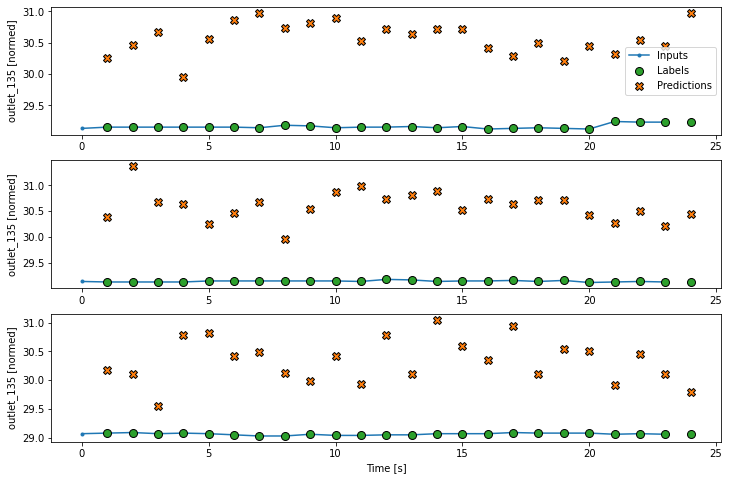

In [60]:
wide_window.plot(linear, plot_col="outlet_135")

In [61]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

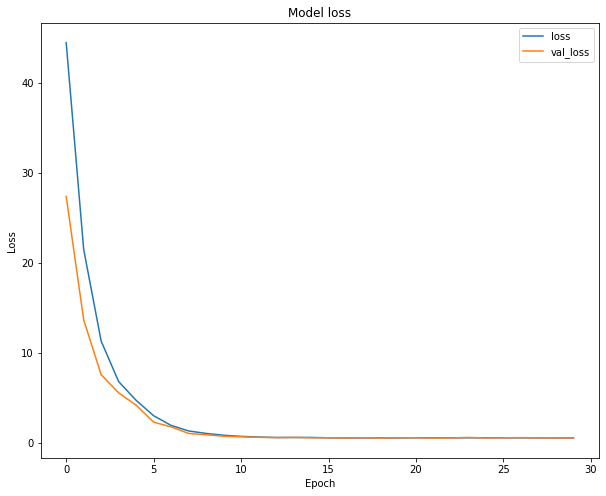

In [62]:
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [63]:
linear.evaluate(single_step_window.test)

1/1 [==============================] - 0s 254ms/step - loss: 0.5112 - root_mean_squared_error: 0.7997


[0.511150062084198, 0.7996561527252197]

## Case 4

In [64]:
train_df, test_df, val_df = train_test_val_split(case_4)
print("train shape:", train_df.shape)
print("val shape:", val_df.shape)
print("test shape:", test_df.shape)

train shape: (259, 272)
val shape: (74, 272)
test shape: (38, 272)


In [65]:
# train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

In [66]:
# Generate window
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df,
    val_df=val_df, test_df=test_df,
    label_columns=label_columns
    )
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['outlet_fan_speed', 'outlet_1', 'outlet_2', 'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8', 'outlet_9', 'outlet_10', 'outlet_11', 'outlet_12', 'outlet_13', 'outlet_14', 'outlet_15', 'outlet_16', 'outlet_17', 'outlet_18', 'outlet_19', 'outlet_20', 'outlet_21', 'outlet_22', 'outlet_23', 'outlet_24', 'outlet_25', 'outlet_26', 'outlet_27', 'outlet_28', 'outlet_29', 'outlet_30', 'outlet_31', 'outlet_32', 'outlet_33', 'outlet_34', 'outlet_35', 'outlet_36', 'outlet_37', 'outlet_38', 'outlet_39', 'outlet_40', 'outlet_41', 'outlet_42', 'outlet_43', 'outlet_44', 'outlet_45', 'outlet_46', 'outlet_47', 'outlet_48', 'outlet_49', 'outlet_50', 'outlet_51', 'outlet_52', 'outlet_53', 'outlet_54', 'outlet_55', 'outlet_56', 'outlet_57', 'outlet_58', 'outlet_59', 'outlet_60', 'outlet_61', 'outlet_62', 'outlet_63', 'outlet_64', 'outlet_65', 'outlet_66', 'outlet_67', 'outlet_68', 'outlet_69', 'outlet_70

In [67]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 272)
Labels shape (batch, time, features): (32, 1, 136)


In [68]:
history = linear.fit(
    single_step_window.train,
    epochs=MAX_EPOCHS,
    validation_data=single_step_window.val,
    # callbacks=[early_stopping]
)

Epoch 1/30
9/9 [==============================] - 0s 43ms/step - loss: 9.3054 - root_mean_squared_error: 3.4572 - val_loss: 6.5448 - val_root_mean_squared_error: 2.8826
Epoch 2/30
9/9 [==============================] - 0s 39ms/step - loss: 6.1519 - root_mean_squared_error: 2.8469 - val_loss: 4.2229 - val_root_mean_squared_error: 2.3214
Epoch 3/30
9/9 [==============================] - 0s 41ms/step - loss: 4.4694 - root_mean_squared_error: 2.4206 - val_loss: 3.8288 - val_root_mean_squared_error: 2.2069
Epoch 4/30
9/9 [==============================] - 0s 40ms/step - loss: 4.1730 - root_mean_squared_error: 2.3293 - val_loss: 5.3616 - val_root_mean_squared_error: 2.6141
Epoch 5/30
9/9 [==============================] - 0s 40ms/step - loss: 4.2818 - root_mean_squared_error: 2.3588 - val_loss: 2.6436 - val_root_mean_squared_error: 1.8370
Epoch 6/30
9/9 [==============================] - 0s 41ms/step - loss: 2.9439 - root_mean_squared_error: 1.9624 - val_loss: 2.1805 - val_root_mean_squared_

In [69]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 272)
Labels shape (batch, time, features): (32, 24, 136)


label_col_index 135
label_col_index 135
label_col_index 135


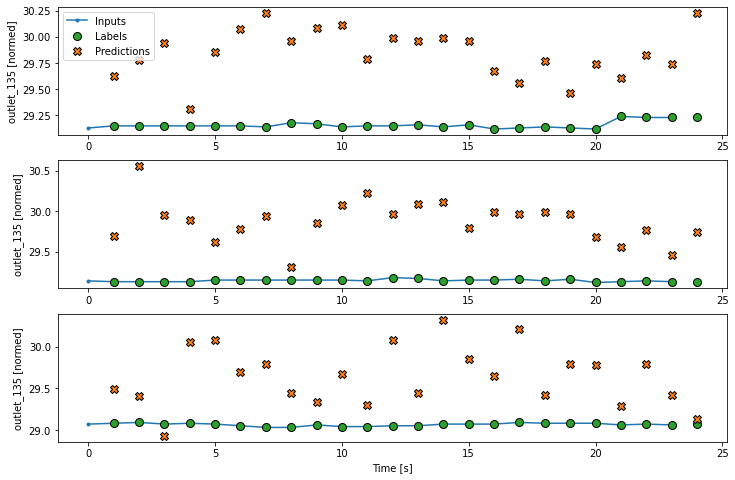

In [70]:
wide_window.plot(linear, plot_col="outlet_135")

In [71]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

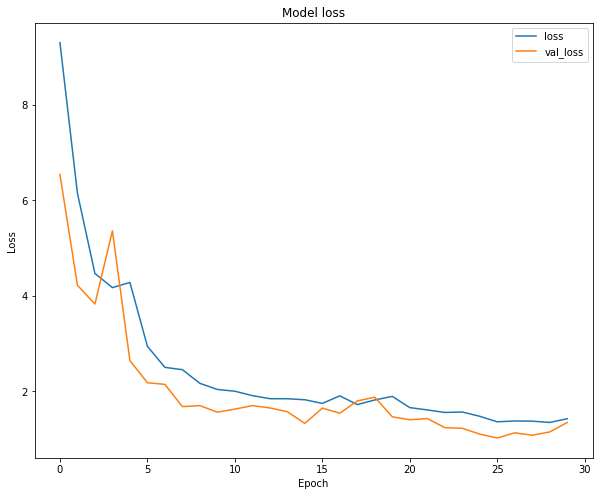

In [72]:
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [73]:
linear.evaluate(single_step_window.test)

2/2 [==============================] - 0s 102ms/step - loss: 1.2931 - root_mean_squared_error: 1.2778


[1.293147087097168, 1.2778267860412598]

## Case 5

In [74]:
train_df, test_df, val_df = train_test_val_split(case_5)
print("train shape:", train_df.shape)
print("val shape:", val_df.shape)
print("test shape:", test_df.shape)

train shape: (548, 272)
val shape: (156, 272)
test shape: (79, 272)


In [75]:
# train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

In [76]:
# Generate window
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df,
    val_df=val_df, test_df=test_df,
    label_columns=label_columns
    )
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['outlet_fan_speed', 'outlet_1', 'outlet_2', 'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8', 'outlet_9', 'outlet_10', 'outlet_11', 'outlet_12', 'outlet_13', 'outlet_14', 'outlet_15', 'outlet_16', 'outlet_17', 'outlet_18', 'outlet_19', 'outlet_20', 'outlet_21', 'outlet_22', 'outlet_23', 'outlet_24', 'outlet_25', 'outlet_26', 'outlet_27', 'outlet_28', 'outlet_29', 'outlet_30', 'outlet_31', 'outlet_32', 'outlet_33', 'outlet_34', 'outlet_35', 'outlet_36', 'outlet_37', 'outlet_38', 'outlet_39', 'outlet_40', 'outlet_41', 'outlet_42', 'outlet_43', 'outlet_44', 'outlet_45', 'outlet_46', 'outlet_47', 'outlet_48', 'outlet_49', 'outlet_50', 'outlet_51', 'outlet_52', 'outlet_53', 'outlet_54', 'outlet_55', 'outlet_56', 'outlet_57', 'outlet_58', 'outlet_59', 'outlet_60', 'outlet_61', 'outlet_62', 'outlet_63', 'outlet_64', 'outlet_65', 'outlet_66', 'outlet_67', 'outlet_68', 'outlet_69', 'outlet_70

In [77]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 272)
Labels shape (batch, time, features): (32, 1, 136)


In [78]:
history = linear.fit(
    single_step_window.train,
    epochs=MAX_EPOCHS,
    validation_data=single_step_window.val,
    verbose=0,
    # callbacks=[early_stopping],
)

In [79]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 272)
Labels shape (batch, time, features): (32, 24, 136)


label_col_index 135
label_col_index 135
label_col_index 135


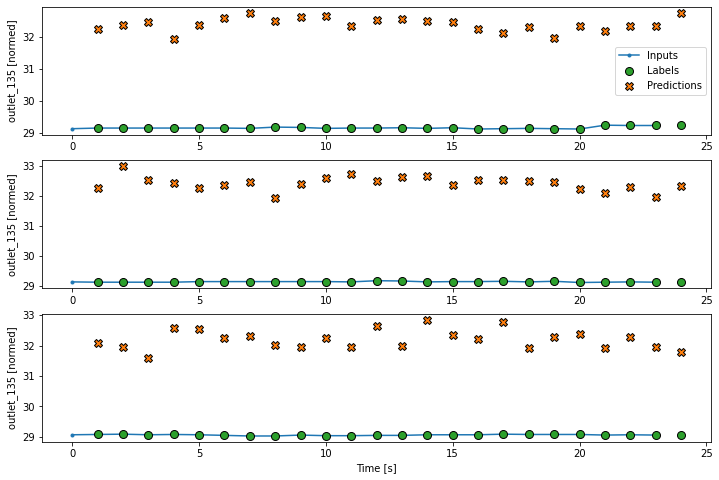

In [80]:
wide_window.plot(linear, plot_col="outlet_135")

In [81]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

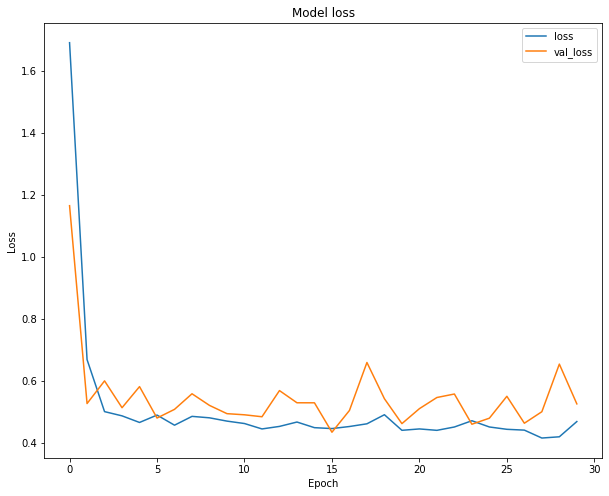

In [82]:
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

<AxesSubplot:title={'center':'RMSE'}, xlabel='Epoch', ylabel='RMSE'>

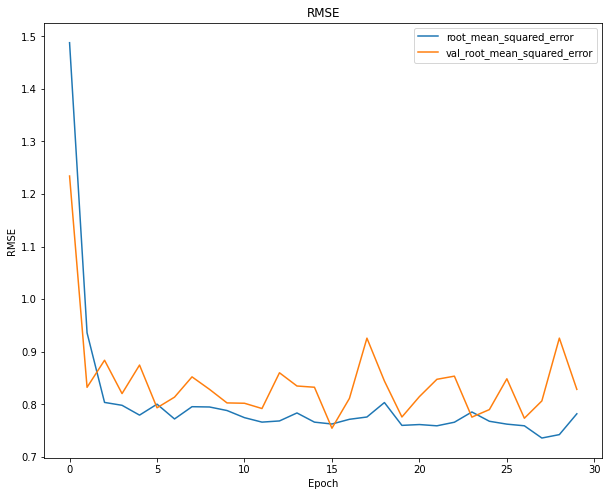

In [83]:
losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")

In [84]:
linear.evaluate(single_step_window.test)

3/3 [==============================] - 0s 14ms/step - loss: 0.6267 - root_mean_squared_error: 0.8874


[0.6266806125640869, 0.8874420523643494]